# Mushroom Classification Using Machine Learning

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#### Importing Data

In [3]:
data_df=pd.read_csv('mushroom_trn_data.csv')
labels_df=pd.read_csv('mushroom_trn_class_labels.csv', header=None)
labels_df.columns=['Data No.', 'label']
data_df = data_df.join(labels_df.label)
data_df.head()
test_df=pd.read_csv('mushroom_tst_data.csv')

### Data Exploration

In [4]:
data_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,f,y,g,t,n,f,c,b,n,t,...,p,w,p,w,o,p,n,y,d,e
1,f,f,e,t,n,f,c,b,p,t,...,g,g,p,w,o,p,k,v,d,e
2,f,s,g,f,n,f,w,b,h,t,...,w,w,p,w,o,e,k,a,g,e
3,x,s,w,f,c,f,w,n,u,e,...,w,w,p,w,o,p,n,v,d,p
4,x,s,n,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,p,p


In [5]:
# Dataset Shape
data_df.shape

(7311, 23)

In [6]:
#Checking For Null Values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 7311 non-null   object
 1   cap-surface               7311 non-null   object
 2   cap-color                 7311 non-null   object
 3   bruises                   7311 non-null   object
 4   odor                      7311 non-null   object
 5   gill-attachment           7311 non-null   object
 6   gill-spacing              7311 non-null   object
 7   gill-size                 7311 non-null   object
 8   gill-color                7311 non-null   object
 9   stalk-shape               7311 non-null   object
 10  stalk-root                7311 non-null   object
 11  stalk-surface-above-ring  7311 non-null   object
 12  stalk-surface-below-ring  7311 non-null   object
 13  stalk-color-above-ring    7311 non-null   object
 14  stalk-color-below-ring  

In [7]:
data_df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
count,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,...,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3287,2899,2039,4268,3177,7129,6124,5056,1557,4156,...,4024,3968,7311,7139,6730,3563,2157,3639,2839,3787


In [8]:
# Count of the unique occurences in 'label' column
z=data_df['label'].value_counts()
print(z)

e    3787
p    3524
Name: label, dtype: int64


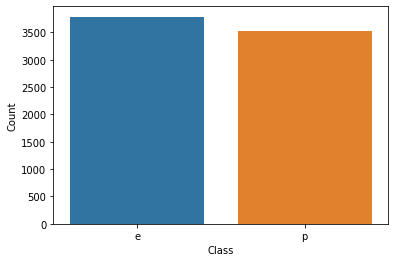

In [9]:
ax = sns.barplot(x=['e','p'], y=[3787,3524])
plt.ylabel('Count')
plt.xlabel('Class')
plt.savefig("count-plot.png",format='png',dpi=300)
plt.show()

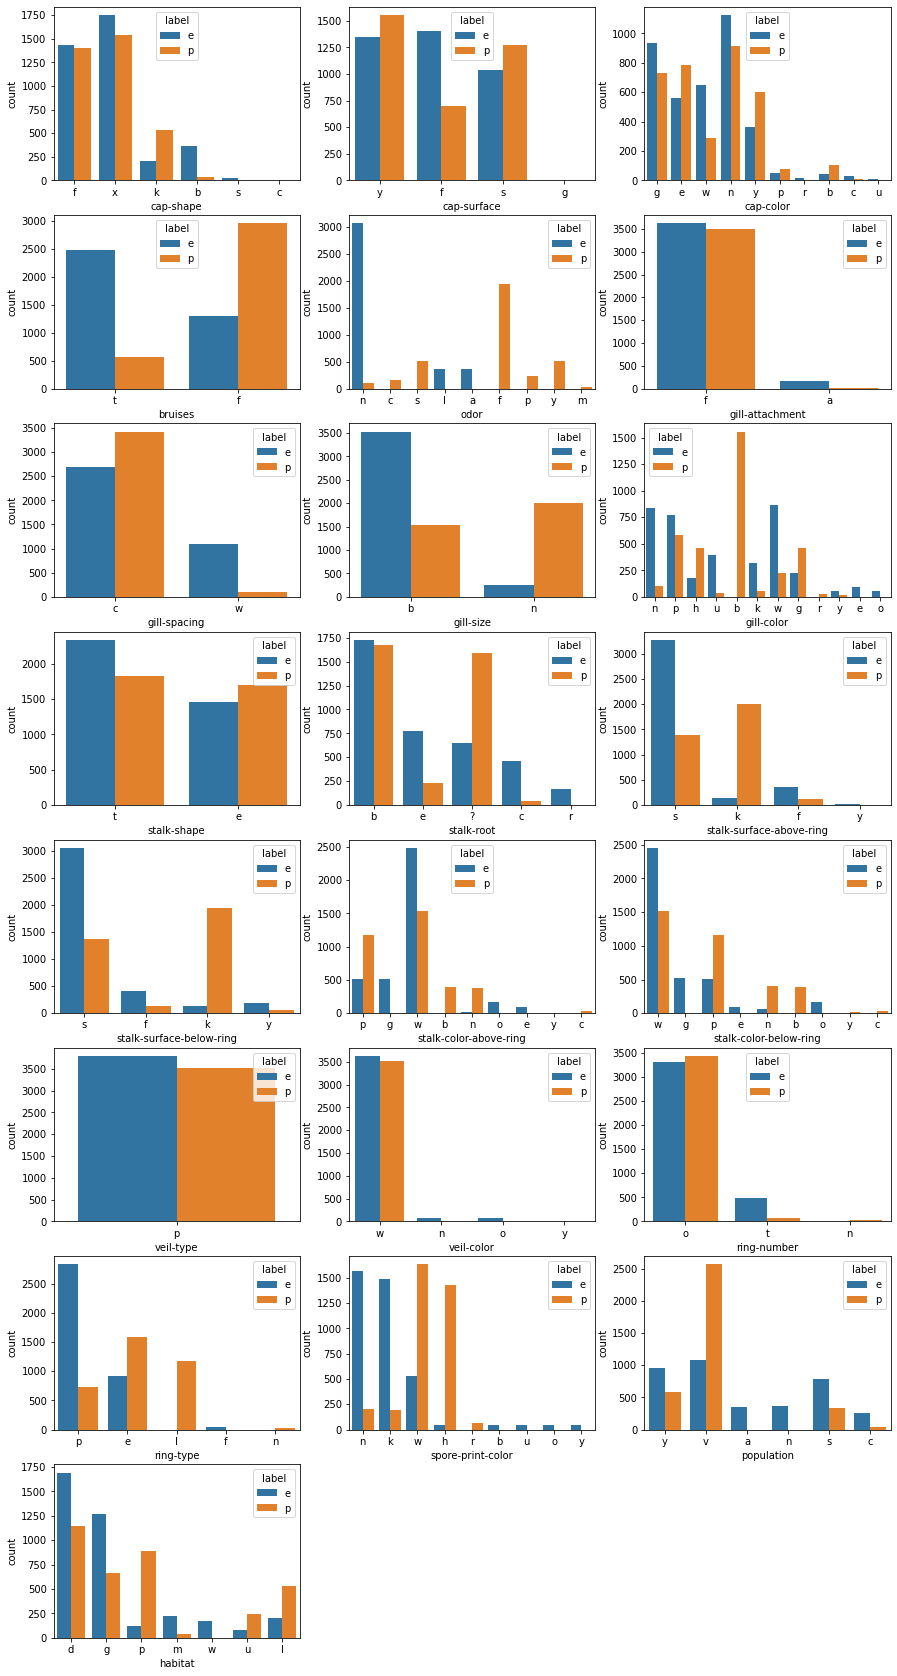

In [10]:
columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population',
 'habitat',]
plt.figure(figsize=(15,30))
for i in list(enumerate(columns)):
    plt.subplot(8,3,i[0]+1)
    sns.countplot(i[1],hue='label',data=data_df,)

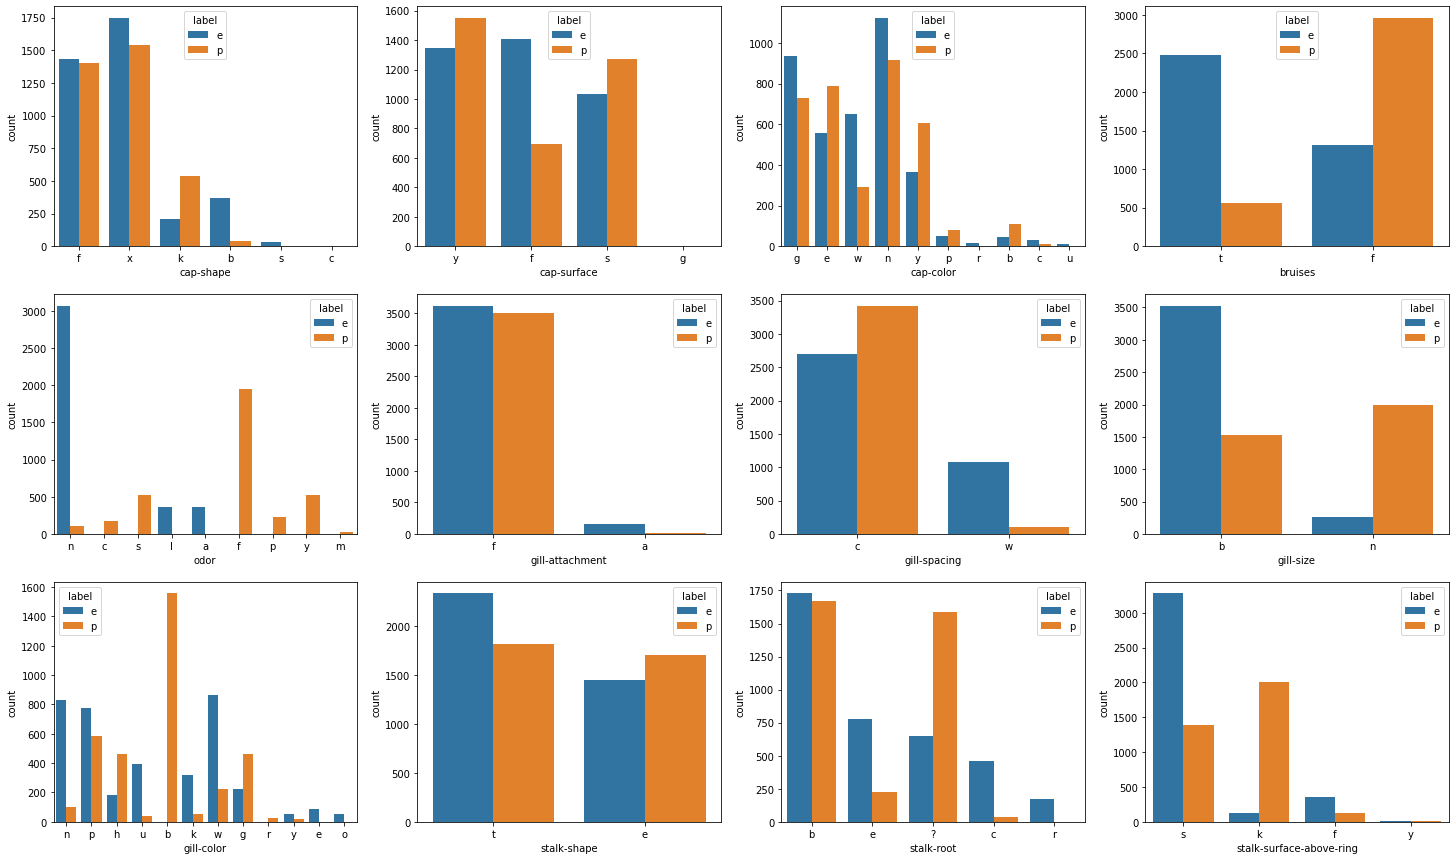

In [11]:
plt.figure(figsize=(25,15))
for i in list(enumerate(data_df.columns[:12])):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(i[1],hue='label',data=data_df,)

plt.savefig("feature_count_plots.png", format='png', dpi=300)
plt.show()

#### Encoding Data

In [12]:
labelencoder=LabelEncoder()

for column in data_df.columns:
    data_df[column] = labelencoder.fit_transform(data_df[column])
    
for column in test_df.columns:
    test_df[column] = labelencoder.fit_transform(test_df[column])

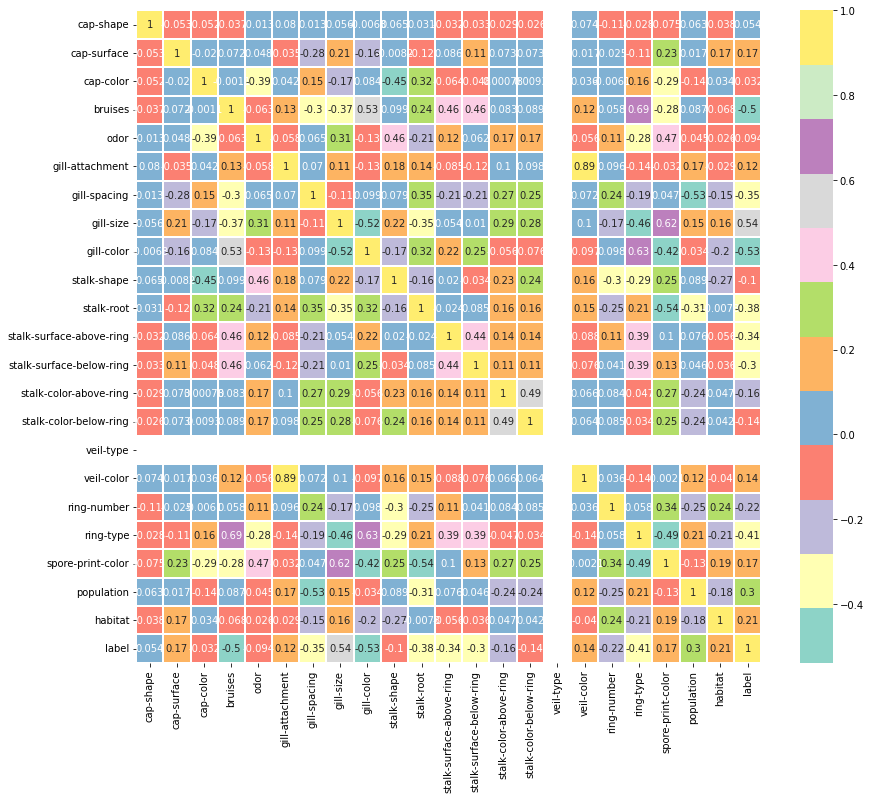

In [13]:
# Correlation between different features
plt.figure(figsize=(14,12))
ax = sns.heatmap(data_df.corr(),linewidths=.1,cmap='Set3', annot=True)


#### Preparing Data

In [14]:
# Separating Fetures and Class Labels 
X = data_df.iloc[:,0:22] 
Y = data_df.iloc[:,22] 

# Train-Test Split with Test Size=20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) 

In [55]:
# Dataframe for storing scores of different models
clf_report = pd.DataFrame(columns=['Model', 'Accuracy', 'f1-score','Precision','Recall',])

In [16]:
#Defining clf_report_save function for Generating and Appending Classification Report( to the clf_report dataframe)

def clf_report_save(model_name,Y_test, y_pred):
    print("{} Classifier report: \n\n".format(model_name), classification_report(Y_test, y_pred))
    test_acc = metrics.accuracy_score(Y_test, y_pred)
    f1_scr= metrics.f1_score(Y_test, y_pred)
    precision_scr=metrics.precision_score(Y_test, y_pred)
    recall_scr=metrics.recall_score(Y_test, y_pred)
    
    score_dict={'Model': model_name
                , 'Accuracy':test_acc
                , 'f1-score':f1_scr
                ,'Precision':precision_scr
                ,'Recall':recall_scr
               }
    return score_dict
    

In [17]:
# Defining Function for Plotting Confusion Matrix
def plot_confusion_matrix(classifier,X_test,Y_test):
    
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]

    for title, normalize in titles_options:

        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            X_test,
           Y_test,
            cmap='tab20c',
            normalize=normalize,
        )
        disp.ax_.set_title(title)

    plt.show()

## Model Training and Testing

### 1. Logistic Regression

###### Without Any Hyper-Parameter Tuning

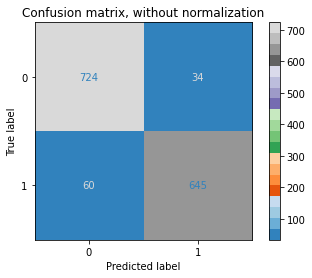

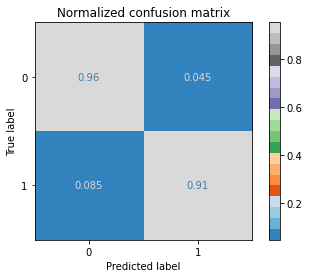

Accuracy on test set: 0.9357484620642516


In [56]:
lr_pipeline=Pipeline([('clf',LogisticRegression())])
lr_pipeline.steps

lr_pipeline.fit(X_train, Y_train)
y_pred = lr_pipeline.predict(X_test)

plot_confusion_matrix(lr_pipeline,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)

In [57]:
clf_report=clf_report.append(clf_report_save('Logistic Regression (without Tuning)',Y_test, y_pred), ignore_index = True)

Logistic Regression (without Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       0.92      0.96      0.94       758
           1       0.95      0.91      0.93       705

    accuracy                           0.94      1463
   macro avg       0.94      0.94      0.94      1463
weighted avg       0.94      0.94      0.94      1463



###### With Hyper-Parameter Tuning

Fitting 50 folds for each of 60 candidates, totalling 3000 fits
Best parameters:  {'lr_clf__C': 1, 'lr_clf__penalty': 'l1', 'lr_clf__solver': 'liblinear'} 



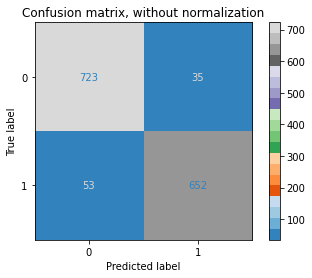

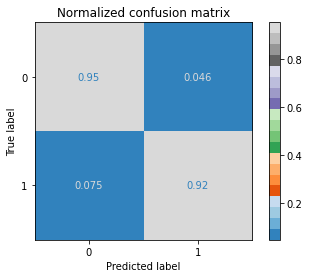

Accuracy on test set: 0.9398496240601504


In [58]:
lr_ht_pipeline = Pipeline([
            ('lr_clf', LogisticRegression())
        ])
params = {
        'lr_clf__penalty':['l1','l2', 'elasticnet'], 
        'lr_clf__C':[0.5,0.6,0.7,1],
        'lr_clf__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',],
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
grid_lr = GridSearchCV(
            lr_ht_pipeline,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
            n_jobs=-1
        )
grid_lr.fit(X_train, Y_train)
print('Best parameters: ', grid_lr.best_params_, '\n')

y_pred = grid_lr.predict(X_test)

plot_confusion_matrix(grid_lr,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)



In [59]:
clf_report=clf_report.append(clf_report_save('Logistic Regression (with HP Tuning)',Y_test, y_pred), ignore_index = True)

Logistic Regression (with HP Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       758
           1       0.95      0.92      0.94       705

    accuracy                           0.94      1463
   macro avg       0.94      0.94      0.94      1463
weighted avg       0.94      0.94      0.94      1463



### 2. Naive Bayes

###### Without Any Hyper-Parameter Tuning

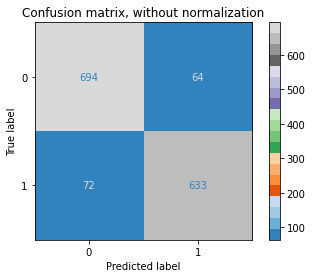

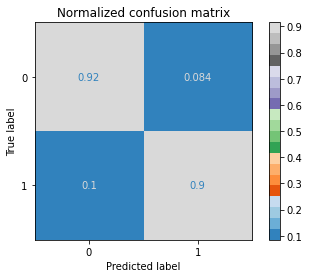

Accuracy on test set: 0.9070403280929596


In [60]:
nb_pipeline=Pipeline([('clf',GaussianNB())])
nb_pipeline.steps

nb_pipeline.fit(X_train, Y_train)
y_pred = nb_pipeline.predict(X_test)

plot_confusion_matrix(nb_pipeline,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)

In [61]:
clf_report=clf_report.append(clf_report_save('Gaussian Naive Bayes (without Tuning)',Y_test, y_pred), ignore_index = True)

Gaussian Naive Bayes (without Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       0.91      0.92      0.91       758
           1       0.91      0.90      0.90       705

    accuracy                           0.91      1463
   macro avg       0.91      0.91      0.91      1463
weighted avg       0.91      0.91      0.91      1463



###### With Hyper-Parameter Tuning

Fitting 50 folds for each of 100 candidates, totalling 5000 fits
Best parameters:  {'nb_clf__var_smoothing': 0.0002848035868435799} 



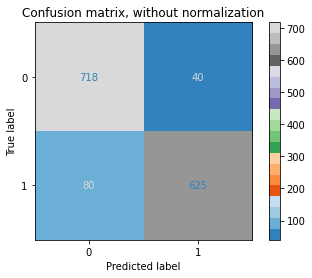

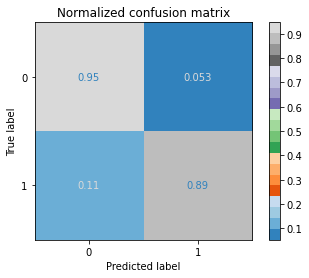

Accuracy on test set: 0.9179767600820232


In [62]:
nb_ht_pipeline = Pipeline([
            ('nb_clf', GaussianNB())
        ])
params = {        
        'nb_clf__var_smoothing':np.logspace(0,-13,num=100),
         }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
grid_nb = GridSearchCV(
            nb_ht_pipeline,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
            n_jobs=-1
        )
grid_nb.fit(X_train, Y_train)
print('Best parameters: ', grid_nb.best_params_, '\n')

y_pred = grid_nb.predict(X_test)

plot_confusion_matrix(grid_nb,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)



In [63]:
clf_report=clf_report.append(clf_report_save('Gaussian Naive Bayes (with HP Tuning)',Y_test, y_pred), ignore_index = True)

Gaussian Naive Bayes (with HP Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       0.90      0.95      0.92       758
           1       0.94      0.89      0.91       705

    accuracy                           0.92      1463
   macro avg       0.92      0.92      0.92      1463
weighted avg       0.92      0.92      0.92      1463



### 3. Decision Tree Classifier

###### Without Any Hyper-Parameter Tuning

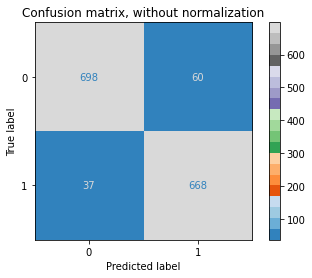

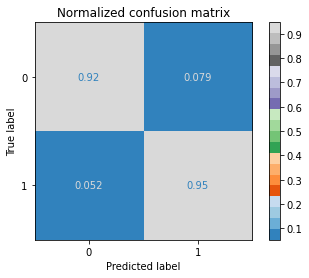

Accuracy on test set: 0.9336978810663021


In [64]:
dtc_pipeline=Pipeline([('clf',DecisionTreeClassifier())])

dtc_pipeline.fit(X_train, Y_train)
y_pred = dtc_pipeline.predict(X_test)

plot_confusion_matrix(dtc_pipeline,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)

In [65]:
clf_report=clf_report.append(clf_report_save('Decision Tree (without Tuning)',Y_test, y_pred), ignore_index = True)

Decision Tree (without Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.92      0.94       758
           1       0.92      0.95      0.93       705

    accuracy                           0.93      1463
   macro avg       0.93      0.93      0.93      1463
weighted avg       0.93      0.93      0.93      1463



###### With Hyper-Parameter Tuning

Fitting 50 folds for each of 120 candidates, totalling 6000 fits
Best parameters:  {'dt_clf__ccp_alpha': 0.0, 'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 40, 'dt_clf__max_features': 'sqrt'} 



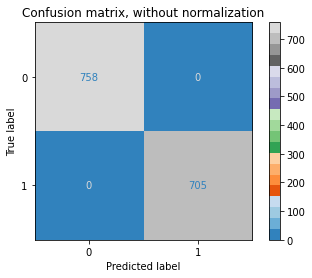

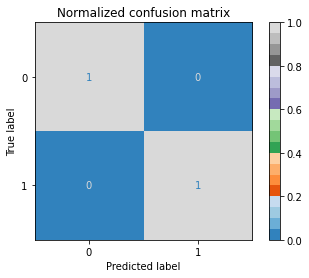

Accuracy on test set: 1.0


In [66]:
dtc_ht_pipeline = Pipeline([
            ('dt_clf', DecisionTreeClassifier())
        ])
params = {
        'dt_clf__criterion':['gini', 'entropy'], 
        'dt_clf__max_features':['auto', 'sqrt', 'log2'],
        'dt_clf__max_depth':[10,40,45,60],
        'dt_clf__ccp_alpha':[0.00,0.009,0.01,0.05,0.1],
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
grid_dtc = GridSearchCV(
            dtc_ht_pipeline,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
            n_jobs=-1
        )
grid_dtc.fit(X_train, Y_train)
print('Best parameters: ', grid_dtc.best_params_, '\n')

y_pred = grid_dtc.predict(X_test)

plot_confusion_matrix(grid_dtc,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)



In [67]:
clf_report=clf_report.append(clf_report_save('Decision Tree (with HP Tuning)',Y_test, y_pred), ignore_index = True)

Decision Tree (with HP Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



### 4. Support Vector Machine

###### Without Any Hyper-Parameter Tuning

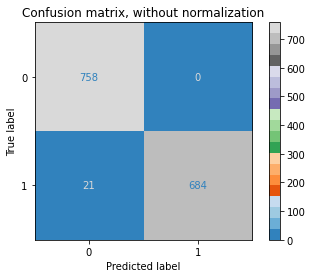

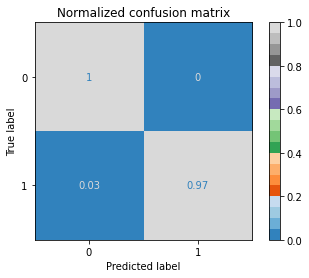

Accuracy on test set: 0.9856459330143541


In [68]:
svm_pipeline=Pipeline([('clf',SVC())])
svm_pipeline.steps

svm_pipeline.fit(X_train, Y_train)
y_pred = svm_pipeline.predict(X_test)

plot_confusion_matrix(svm_pipeline,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)

In [69]:
clf_report=clf_report.append(clf_report_save('Support Vector Machine (without Tuning)',Y_test, y_pred), ignore_index = True)

Support Vector Machine (without Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       758
           1       1.00      0.97      0.98       705

    accuracy                           0.99      1463
   macro avg       0.99      0.99      0.99      1463
weighted avg       0.99      0.99      0.99      1463



###### With Hyper-Parameter Tuning

Fitting 50 folds for each of 20 candidates, totalling 1000 fits
Best parameters:  {'svm_clf__C': 10, 'svm_clf__kernel': 'poly'} 



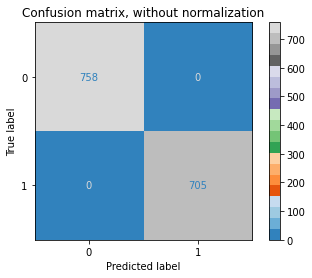

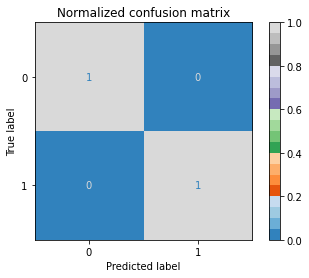

Accuracy on test set: 1.0


In [70]:
svm_ht_pipeline = Pipeline([
            ('svm_clf', SVC())
        ])
params = {
        'svm_clf__C':[0.1,1,10,20,30],
        'svm_clf__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
grid_svm = GridSearchCV(
            svm_ht_pipeline,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
            n_jobs=-1
        )
grid_svm.fit(X_train, Y_train)
print('Best parameters: ', grid_svm.best_params_, '\n')

y_pred = grid_svm.predict(X_test)

plot_confusion_matrix(grid_svm,X_test,Y_test)
test_acc = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', test_acc,)



In [71]:
clf_report=clf_report.append(clf_report_save('Support Vector Machine (with HP Tuning)',Y_test, y_pred), ignore_index = True)

Support Vector Machine (with HP Tuning) Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



In [72]:
print("Final All Classifier Report:\n\n")
clf_report

Final All Classifier Report:




,Model,Accuracy,f1-score,Precision,Recall
0,Logistic Regression (without Tuning),0.935748,0.932081,0.949926,0.914894
1,Logistic Regression (with HP Tuning),0.93985,0.936782,0.949054,0.924823
2,Gaussian Naive Bayes (without Tuning),0.90704,0.902996,0.908178,0.897872
3,Gaussian Naive Bayes (with HP Tuning),0.917977,0.912409,0.93985,0.886525
4,Decision Tree (without Tuning),0.933698,0.93231,0.917582,0.947518
5,Decision Tree (with HP Tuning),1.0,1.0,1.0,1.0
6,Support Vector Machine (without Tuning),0.985646,0.984881,1.0,0.970213
7,Support Vector Machine (with HP Tuning),1.0,1.0,1.0,1.0


In [73]:
clf_report.to_csv('clf_report.csv')

### Final Prediction on the mushroom_tst_data.csv (using HyperTuned Decision Tree)

In [81]:
pred_test = pd.DataFrame(grid_dtc.predict(test_df))
pred_test.head()


,0
0,0
1,0
2,0
3,0
4,1


In [85]:
pred_test2=pred_test.replace(to_replace =0,
                 value ="e")

In [86]:
pred_test3=pred_test2.replace(to_replace =1,
                 value ="p")
pred_test3.head()

,0
0,e
1,e
2,e
3,e
4,p


In [87]:
pred_test3.to_csv('predicted_mushroom_tst_class_labels.csv', sep = ',', header=False, index=False)

References:<br>
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <br>
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html    <br>
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br>
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html